### 데이터 로드

#### The Boston Housing Dataset

In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

In [3]:
boston = load_boston()
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
x_data = boston.data
y_data = boston.target.reshape(boston.target.size, 1)

In [6]:
x_data.shape, y_data.shape

((506, 13), (506, 1))

### 데이터 스케일링

In [10]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range = (0, 5)).fit(x_data)
# standard_scale = preprocessing.StandardScaler().fit(x_data)
x_scaled_data = minmax_scale.transform(x_data)
x_scaled_data[:3]

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

### Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size = 0.33)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339, 1), (167, 1))

### Linear Regression Fitting

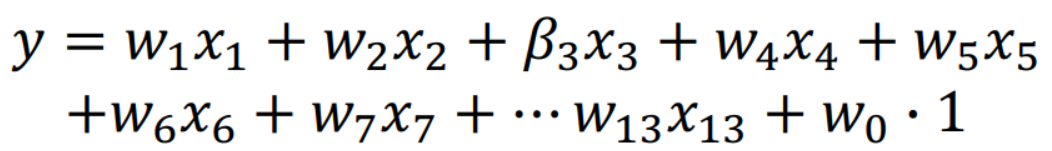

In [13]:
from sklearn import linear_model

regr = linear_model.LinearRegression(fit_intercept = True,   # 절편값(w0)를 넣을건지
                                     normalize = False,
                                     copy_X = True,
                                     n_jobs = 8)
regr.fit(X_train, y_train)
regr

LinearRegression(n_jobs=8)

In [14]:
regr.coef_, regr.intercept_

(array([[-2.42457701,  1.13550023,  0.37363084,  0.72869953, -1.86574555,
          3.26618206,  0.35056346, -3.00892624,  1.52505962, -1.17194821,
         -1.88784918,  0.76849671, -4.27176283]]),
 array([27.09766535]))

### 수식 결과 비교

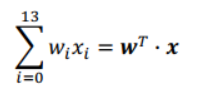

In [15]:
# 밑의 셀과 동일한 연산(1개의 값)
regr.predict(x_data[0].reshape(1, -1))

array([[-11.10670184]])

In [16]:
x_data[0].dot(regr.coef_.T) + regr.intercept_

array([-11.10670184])

In [17]:
# 밑의 셀과 동일한 연산(여러개의 값)
regr.predict(x_data[:5])

array([[-11.10670184],
       [ 14.29132652],
       [ 29.24763497],
       [ 47.46378961],
       [ 42.34122468]])

In [18]:
x_data[:5].dot(regr.coef_.T) + regr.intercept_

array([[-11.10670184],
       [ 14.29132652],
       [ 29.24763497],
       [ 47.46378961],
       [ 42.34122468]])

### Metric 측정

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_true = y_test
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.7443036168131709, 3.2636325307348004, 21.277745967451573)